In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [1]:
def ConjugateGradientLinearSystemEquations(matrix, vector, tolerance, max_iterations):
    """
    Solve a linear system of equations using the Conjugate Gradient method.

    Parameters
    ----------
    matrix : numpy.ndarray
        A square matrix of size n x n.
    vector : numpy.ndarray
        A vector of size n.
    tolerance : float
        The tolerance for the stopping criterion.
    max_iterations : int
        The maximum number of iterations to perform if the stopping criterion is not met.

    Returns
    -------
    optima : numpy.ndarray
        The solution of the linear system of equations.
    cache : tuple or None
        The cache is returned for the purpose of accessing the values of the
        local variables of the algorithm for purposes like plotting or debugging.
    """

    n = len(vector)
    x = np.zeros(n)  # Initial guess for x
    r = vector - matrix.dot(x)  # Residual vector
    p = r.copy()  # Initial search direction

    residuals = []
    gradient_norms = []

    for k in range(max_iterations):
        alpha = np.dot(r, r) / np.dot(p, matrix.dot(p))
        x = x + alpha * p
        new_r = r - alpha * matrix.dot(p)
        beta = np.dot(new_r, new_r) / np.dot(r, r)
        p = new_r + beta * p
        r = new_r

        # Calculate the norm of the residual vector
        residual_norm = np.linalg.norm(vector - matrix.dot(x))
        residuals.append(residual_norm)

        # Calculate the norm of the gradient (residual)
        gradient_norm = np.linalg.norm(matrix.dot(x) - vector)
        gradient_norms.append(gradient_norm)

        if residual_norm < tolerance:
            break
    return x, (residuals, gradient_norms)

In [3]:
def generateRandomSparseSymmetricMatrix(size, density):
    """
    Generate a random sparse symmetric matrix.

    Parameters
    ----------
    size : int
        The size of the matrix.

    density : float
        The density of the generated matrix, density equal to one means a
        full matrix, density of 0 means a matrix with no non-zero items.

    Returns
    -------
    sparse_symmetric_matrix : numpy.ndarray
        Symmetric n x n matrix with random values.
    cache : tuple or None
        The cache is returned for the purpose of accessing the values of the
        local variables of the algorithm for purposes like plotting or debugging.
    """

    M = np.random.rand(size, size)
    M[M > density] = 0  # Sparsify the matrix based on density
    M = np.triu(M) + np.triu(M, 1).T  # Make it symmetric
    return M

In [4]:
def generateRandomSparseVector(size, density):
    """
    Generate a random sparse vector.

    Parameters
    ----------
    size : int
        The size of the vector.

    density : float
        The density of the generated vector, density equal to one means a
        full vector, density of 0 means a vector with no non-zero items.

    Returns
    -------
    sparse_vector numpy.ndarray
        Vector of size n with random values.
    cache : tuple or None
        The cache is returned for the purpose of accessing the values of the
        local variables of the algorithm for purposes like plotting or debugging.
    """

    v = np.random.rand(size)
    v[v > density] = 0  # Sparsify the vector based on density
    return v

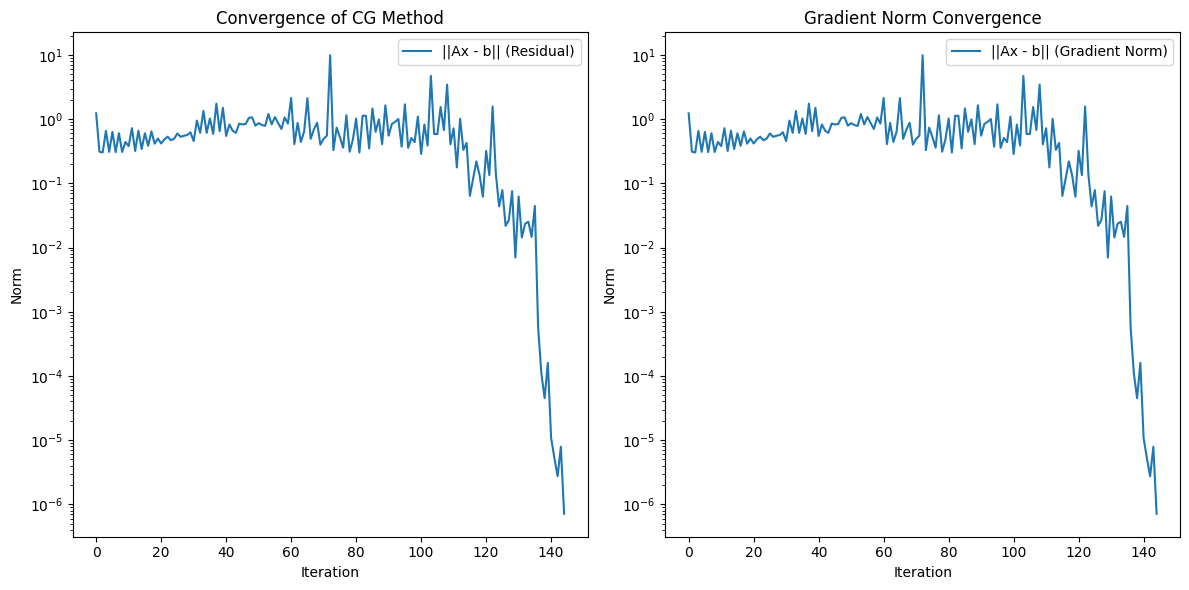

In [6]:
size = 100
density = 0.1

# Generate a random sparse symmetric matrix
A = generateRandomSparseSymmetricMatrix(size, density)

# Generate a random sparse vector
b = generateRandomSparseVector(size, density)

# Solve the linear system using Conjugate Gradient method
solution, cache = ConjugateGradientLinearSystemEquations(A, b,1e-6, 1000)

# Plotting results
residuals, gradient_norms = cache

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(residuals, label='||Ax - b|| (Residual)')
plt.xlabel('Iteration')
plt.ylabel('Norm')
plt.yscale('log')
plt.title('Convergence of CG Method')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(gradient_norms, label='||Ax - b|| (Gradient Norm)')
plt.xlabel('Iteration')
plt.ylabel('Norm')
plt.yscale('log')
plt.title('Gradient Norm Convergence')
plt.legend()

plt.tight_layout()
plt.show()